# Dungeons and Dragons Currency Converter

DND 5th edition

https://stackoverflow.com/questions/44213144/coin-change-with-limited-coins-complexity

In [1]:
import numpy as np
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

In [3]:
if df.empty:
    print('is empty')

is empty


In [4]:
df

""


In [46]:
# Final working function
copper = 1/100
silver = 1/10
electrum = 1/2
gold = 1
platinum = 10

def getCoins(coins, amount, coinIndex = 0):
    amount = float(amount)
    if amount == 0:
        return [] # all done! You did it!
    if coinIndex >= len(coins):
        return None # don't have enough money / coins
    
    # names of coins to print later
    coinNames = ['', 'Gold', 'Copper', 'Silver', 'Electrum', 'Platinum']
    
    # start calculations
    coin = coins[coinIndex] # 1= gold, 2= copper, ...
    coinIndex += 1 
    # First, take as may as possible from first listed coin (will start at Index 1 (gold))
    canTake = int(min(amount / coin['value'], coin['count']))
    
    #Reduce the number taken from this coin until success
    for count in np.arange(canTake, -1.0, -1):  # take away 1 until count reaches 0
        
        # Recurse to decide how many to take from next coin
        change = getCoins(coins, amount - coin['value'] * count, coinIndex)
        if change != None: # Success! We are done!
            if count: # Register this number for this coin
                return change + [{'Coin Name': coinNames[coinIndex], 'Amount': int(count)}]
            return change

In [ ]:
# userNumCopper = 0
# userNumSilver = 0
# userNumElectrum = 0
# userNumGold = 0
# userNumPlatinum = 0

In [ ]:
# # have user input the amount they have for each coin
# userNumCopper = abs( int (input ('Enter number of Copper: '))) 
# userNumSilver = abs (int (input ('Enter number of Silver: '))) 
# userNumElectrum = abs (int (input ('Enter number of Electrum: ')))
# userNumGold = abs (int (input ('Enter number of Gold: ')))
# userNumPlatinum = abs (int (input ('Enter number of Platinum: ')))

In [47]:
# # have user input the amount they have for each coin
while True:
    try: 
        userNumCopper = abs( int (input ('Enter number of Copper: ')))
        userNumSilver = abs (int (input ('Enter number of Silver: ')))
        userNumElectrum = abs (int (input ('Enter number of Electrum: ')))
        userNumGold = abs (int (input ('Enter number of Gold: ')))
        userNumPlatinum = abs (int (input ('Enter number of Platinum: ')))

    except ValueError as e:
        e == 0
        continue
    
    break

Enter number of Copper: 812
Enter number of Silver: 453
Enter number of Electrum: 266
Enter number of Gold: 111
Enter number of Platinum: 6


In [48]:
# tell user how much they have in gold pieces
totalGold = (userNumCopper * copper) + (userNumSilver * silver) + (userNumElectrum * electrum) + \
    (userNumGold) + (userNumPlatinum * platinum)
totalGold = round(totalGold)

print(f'You have {totalGold:,d} gold pieces.')

You have 357 gold pieces.


In [49]:
userSpendGold = int(input ('How much gold do you want to spend? '))

How much gold do you want to spend? 318


In [50]:
if userSpendGold > totalGold:
    print('You do not have enough money. Sorry!')
    print(f'Total Gold: {totalGold} \t Gold you need: {userSpendGold}')
    
else:
    coins = [
    { "value": gold, "count":  userNumGold },
    { "value":  copper, "count": userNumCopper },
    { "value":  silver, "count":  userNumSilver },
    { "value":  electrum, "count":  userNumElectrum },
    { "value": platinum, "count":  userNumPlatinum },   
    ]

    
    result = getCoins(coins, userSpendGold)
    pprint.pprint(result)


[{'Amount': 3, 'Coin Name': 'Platinum'},
 {'Amount': 248, 'Coin Name': 'Electrum'},
 {'Amount': 449, 'Coin Name': 'Silver'},
 {'Amount': 810, 'Coin Name': 'Copper'},
 {'Amount': 111, 'Coin Name': 'Gold'}]


In [10]:
df = pd.DataFrame(result)

In [11]:
df.style.hide_index()

Coin Name,Amount
Silver,370
Electrum,654
Platinum,7
Gold,78


In [12]:
df

,Coin Name,Amount
0,Silver,370
1,Electrum,654
2,Platinum,7
3,Gold,78


In [47]:
# df.set_index('Coin Name')

,Amount
Coin Name,
Electrum,8
Gold,541


In [ ]:
# # plot on matplotlib
def plot_results(data, x, y):
    # set variables
    x = data[x]
    y = data[y]
    colors = ['#CDC8C1', '#F0BE60', '#AB7E43','#D68505', '#7D7C64'] # set colors
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # input variables into horizontal bar chart
    ax.barh(y,x, color = colors)
    ax.set_xlabel('Number of Coins')
    ax.set_ylabel('Coin Type')
    ax.set_title(f'Coins You Need for {userSpendGold} Gold', fontsize= 15);
    
#     #plot on streamlit
#     st.pyplot(fig)
# plot_results(df, 'Amount', 'Coin Name')

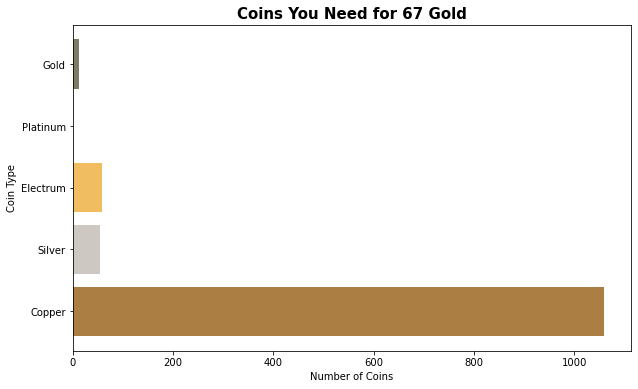

In [50]:
plot_results(df, 'Amount', 'Coin Name')

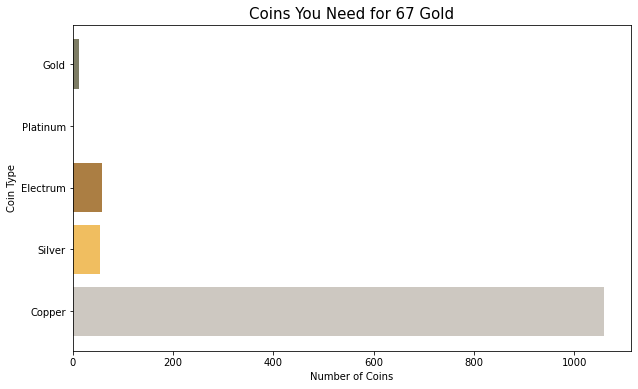

In [42]:
# x = df.Amount
# y = df['Coin Name']
# fig, ax = plt.subplots(figsize=(10, 6))

# colors = ['#CDC8C1', '#F0BE60', '#AB7E43','#D68505', '#7D7C64']
# ax.barh(y,x, color = colors)
# ax.set_xlabel('Number of Coins')
# ax.set_ylabel('Coin Type')
# ax.set_title(f'Coins You Need for {userSpendGold} Gold', fontsize= 15);

And that's it! We did it! Now, to get this into a website so others can use it!

# What it took to get the final product!

Below are the trial and error functions I went through to reach the final working function with the desired output

In [ ]:
coins_given(5876)

In [ ]:
def coins_given(amount):
    coins = [(25, 'quarter'), (10, 'dime'), (5, 'nickel'), (1, 'penny')]
    answer = {}
    for coin_value, coin_name in coins:
        if amount >= coin_value:
            number_coin, amount = divmod(amount, coin_value)
            answer[coin_name] = number_coin
    return answer

In [ ]:
def coins_given(amount):
    coins = [(10, 'platinum'), (1, 'gold'), (.5, 'electrum'), (.1, 'silver'), (.01, 'copper')]
    answer = {}
    for coin_value, coin_name in coins:
        if amount >= coin_value:
            number_coin, amount = divmod(amount, coin_value)
            answer[coin_name] = number_coin
    return answer

In [ ]:
coins_given(4566)

# Get Coin Info from User

In [ ]:
# used for demo 34 copper, 54, 5, 677, 4 plat
userNumCopper = int (input ('Enter number of Copper: '))
userNumSilver = int (input ('Enter number of Silver: '))
userNumElectrum = int (input ('Enter number of Electrum: '))
userNumGold = int (input ('Enter number of Gold: '))
userNumPlatinum = int (input ('Enter number of Platinum: '))

In [ ]:
userNumCopper

In [ ]:
11 * silver

In [ ]:
# tell user how much they have in gold pieces
totalGold = (userNumCopper * copper) + (userNumSilver * silver) + (userNumElectrum * electrum) + \
    (userNumGold) + (userNumPlatinum * platinum)
totalGold = round(totalGold)

print(f'You have {totalGold} gold pieces.')

In [ ]:
userSpendGold = int(input ('How much gold do you want to spend? '))

In [ ]:
userSpendGold

In [ ]:
if userSpendGold > totalGold:
    print('You do not have enough money. Sorry!')
    print(f'Total Gold: {totalGold} \t Gold you need: {userSpendGold}')

In [28]:
# function to get coins from
def change(n, coins_available, coins_used):
    if sum(coins_used) == n:
        yield coins_used
    elif sum(coins_used) > n:
        pass
    elif coins_available == []:
        pass
    else:
        # have multiple occurances of the same coin within the same list
        # if you are not removing the available ones, you will always end up with what you have
        # n= 5 -> 1,1,1,1,1 or 5
        for c in change(n, coins_available[:], coins_used + [coins_available[0]]):
            yield c
        # stop picking 1's and move on to 5's
        for c in change(n, coins_available[1:], coins_used):
            yield c

In [31]:
coins = [1, 10, 50, 100, 1000]
n = 693
solutions = [i for i in change(n, coins, [])]

print ('Best Solution: ', min(solutions, key= len))

Best Solution:  [1, 1, 1, 10, 10, 10, 10, 50, 100, 100, 100, 100, 100, 100]


# Get it to use user input

In [ ]:
userSpendGold = 702

In [ ]:
# subtract gold from userspendgold
newGoldValue = userSpendGold - userNumGold

In [ ]:
newGoldValue
#25

In [ ]:
# next subtract next largest value - platinum
newGoldValue = newGoldValue - (userNumPlatinum * platinum)

In [ ]:
newGoldValue
#-15

In [ ]:
# next subtract next largest value - electrum
newGoldValue = newGoldValue - (userNumElectrum * electrum)

In [ ]:
newGoldValue

In [ ]:
def getChange(coins, amount, coinIndex = 0):
    if amount == 0:
        return [] # success
    if coinIndex >= len(coins):
        return None # failure
    coin = coins[coinIndex]
    coinIndex += 1
    # Start by taking as many as possible from this coin
    canTake = min(amount // coin["value"], coin["count"])
    # Reduce the number taken from this coin until success
    for count in range(canTake, -1, -1): # count will go down to zero
        # Recurse to decide how many to take from the next coins
        change = getChange(coins, amount - coin["value"] * count, coinIndex)
        if change != None: # We had success
            if count: # Register this number for this coin:
                return change + [{ "value": coin["value"], "count": count }]
            return change


# Example data and call:
coins = [
    { "value": 20, "count":  2 },   
    { "value": 10, "count":  2 },
    { "value":  5, "count":  3 },
    { "value":  2, "count":  2 },
    { "value":  1, "count": 10 }
]

result = getChange(coins, 84)
print(result)

In [ ]:
# use DND currency terms
def getChange(coins, amount, coinIndex = 0):
    amount = float(amount)
    if amount == 0:
        return [] # success
    if coinIndex >= len(coins):
        return None # failure
    coin = coins[coinIndex]
    coinIndex += 1
    # Start by taking as many as possible from this coin
    canTake = min(amount // coin["value"], coin["count"])
    # Reduce the number taken from this coin until success
    for count in np.arange(canTake, -1.0, -1): # count will go down to zero
        # Recurse to decide how many to take from the next coins
        change = getChange(coins, amount - coin["value"] * count, coinIndex)
        if change != None: # We had success
            if count: # Register this number for this coin:
                return change + [{ "value": coin["value"], "count": count }]
            return change


# Example data and call:
coins = [
    { "value": gold, "count":  676 },   
    { "value": platinum, "count":  4 },   
    { "value":  electrum, "count":  5 },
    { "value":  silver, "count":  0 },
    { "value":  copper, "count": 1000 } 
]

result = getChange(coins, 719)
print(result)

In [ ]:
# use DND currency terms
def getChange(coins, amount, coinIndex = 0):
    amount = float(amount)
    if amount == 0:
        return [] # success
    if coinIndex >= len(coins):
        return None # failure
    coin = coins[coinIndex]
    coinIndex += 1
    # Start by taking as many as possible from this coin
    canTake = min(amount / coin["value"], coin["count"])
    # Reduce the number taken from this coin until success
    for count in np.arange(canTake, -1.0, -1): # count will go down to zero
        # Recurse to decide how many to take from the next coins
        change = getChange(coins, amount - coin["value"] * count, coinIndex)
        if change != None: # We had success
            if count: # Register this number for this coin:
                return change + [{ "value": coin["value"], "count": count }]
            return change


# Example data and call:
coins = [
    { "value": gold, "count":  676 },   
    { "value": platinum, "count":  14 },   
    { "value":  electrum, "count":  500 },
    { "value":  silver, "count":  10 },
    { "value":  copper, "count": 1000 } 
]

result = getChange(coins, 842)
print(result)

In [ ]:
# use DND currency terms
def getChange(coins, amount, coinIndex = 0):
    amount = float(amount)
    if amount == 0:
        return [] # success
    if coinIndex >= len(coins):
        return None # failure
    coin = coins[coinIndex]
    coinIndex += 1
    print(coinIndex)
    # Start by taking as many as possible from this coin
    canTake = int(min(amount / coin["value"], coin["count"]))
    print (canTake)
    # Reduce the number taken from this coin until success
    for count in np.arange(canTake, -1.0, -1): # count will go down to zero
        # Recurse to decide how many to take from the next coins
        change = getChange(coins, amount - coin["value"] * count, coinIndex)
        if change != None: # We had success
            if count: # Register this number for this coin:
                return change + [{ "value": coin["value"], "count": count }]
            return change


# Example data and call:
coins = [
    { "value": gold, "count":  676 },   
    { "value": platinum, "count":  17 },   
    { "value":  electrum, "count":  10 },
    { "value":  silver, "count":  1 },
    { "value":  copper, "count": 1000 } 
]

result = getChange(coins, 854)
print(result)

In [ ]:
# Final working function
def getCoins(coins, amount, coinIndex = 0):
    amount = float(amount)
    if amount == 0:
        return [] # all done! You did it!
    if coinIndex >= len(coins):
        return None # don't have enough money / coins
    
    # start calculations
    coinNames = ['', 'Gold', 'Platinum', 'Electrum', 'Silver', 'Copper']
    coin = coins[coinIndex] # 1= gold, 2= platinum, ...
    coinIndex += 1 
    # First, take as may as possible from first listed coin (will start at Index 1 (gold))
    canTake = int(min(amount / coin['value'], coin['count']))
    
    #Reduce the number taken from this coin until success
    for count in np.arange(canTake, -1.0, -1):  # take away 1 until count reaches 0
        
        # Recurse to decide how many to take from next coin
        change = getCoins(coins, amount - coin['value'] * count, coinIndex)
        if change != None: # Success! We are done!
            if count: # Register this number for this coin
                print(f'Gold Needed: {amount}')
                return change + [{'Coin Name': coinNames[coinIndex], 'Amount': int(count)}]
            return change

In [ ]:
coins = [
    { "value": gold, "count":  676 },   
    { "value": platinum, "count":  17 },   
    { "value":  electrum, "count":  10 },
    { "value":  silver, "count":  1 },
    { "value":  copper, "count": 1000 } 
]

result = getCoins(coins, userSpendGold)
print(result)